# Régression


Exemple de régression linéaire avec pytorch

[REQUIREMENTS.txt](#requirements)

In [1]:
# --- Imports

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --- Générer 20 lignes de données
N = 20

X = np.random.random(N)*10 -5
y = 0.5 * X -1 + np.random.randn(N)

In [3]:
print('shape de X : ',X.shape)
print('shape de y : ',y.shape)

shape de X :  (20,)
shape de y :  (20,)


In [4]:
X

array([-0.22735855,  4.35456105, -0.20367636, -3.63680229, -4.98667066,
       -4.66878903, -1.32367814, -3.78796221,  0.90219942,  2.51519691,
       -3.80019571, -2.18311773,  2.17233379, -2.39746202,  2.97648584,
        0.39270253, -1.38995032,  2.6277212 ,  0.1066151 ,  2.57794872])

In [5]:
y

array([ 0.67166969,  3.10182143, -1.37926808, -2.19141321, -4.66885807,
       -3.07201694, -3.26621878, -3.21522124, -0.63164092,  0.69071817,
       -2.17967966, -2.12098448,  1.83237981, -3.17950267, -0.32521866,
        0.57125119, -0.67371585,  1.09878257, -1.3698913 ,  0.51197719])

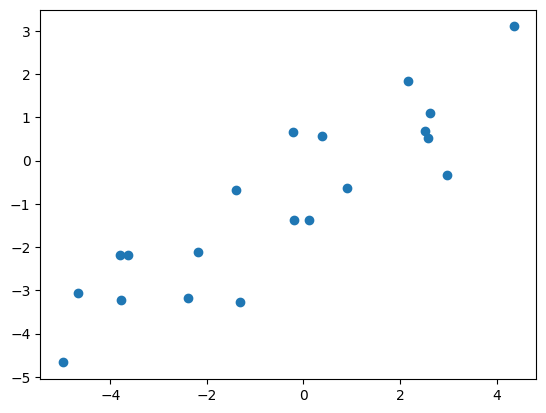

In [6]:
plt.scatter(X, y)
plt.show()

In [7]:
# --- Création du modèle de régression linéaire
model = nn.Linear(1,1)

In [8]:
# --- Entraîner le modèle

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

X = X.reshape(N, 1)
y = y.reshape(N, 1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))

n_epochs = 30
losses = []
for it in range(n_epochs):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    losses.append(loss.item())
    
    loss.backward()
    optimizer.step()

    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')


Epoch 1/30, Loss: 14.5703
Epoch 2/30, Loss: 5.3397
Epoch 3/30, Loss: 2.3205
Epoch 4/30, Loss: 1.3296
Epoch 5/30, Loss: 1.0022
Epoch 6/30, Loss: 0.8927
Epoch 7/30, Loss: 0.8551
Epoch 8/30, Loss: 0.8417
Epoch 9/30, Loss: 0.8365
Epoch 10/30, Loss: 0.8343
Epoch 11/30, Loss: 0.8333
Epoch 12/30, Loss: 0.8327
Epoch 13/30, Loss: 0.8324
Epoch 14/30, Loss: 0.8322
Epoch 15/30, Loss: 0.8321
Epoch 16/30, Loss: 0.8320
Epoch 17/30, Loss: 0.8320
Epoch 18/30, Loss: 0.8319
Epoch 19/30, Loss: 0.8319
Epoch 20/30, Loss: 0.8319
Epoch 21/30, Loss: 0.8319
Epoch 22/30, Loss: 0.8319
Epoch 23/30, Loss: 0.8319
Epoch 24/30, Loss: 0.8319
Epoch 25/30, Loss: 0.8319
Epoch 26/30, Loss: 0.8319
Epoch 27/30, Loss: 0.8319
Epoch 28/30, Loss: 0.8319
Epoch 29/30, Loss: 0.8319
Epoch 30/30, Loss: 0.8319


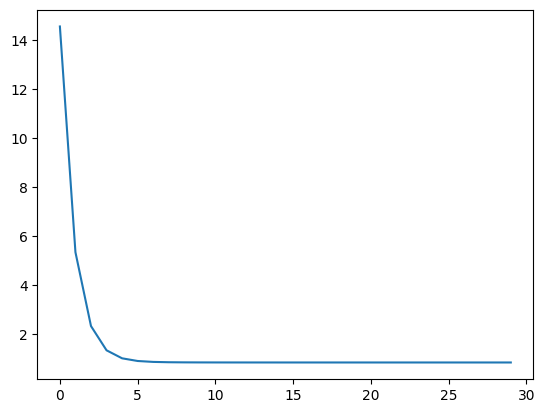

In [9]:
# Loss par itération
plt.plot(losses)

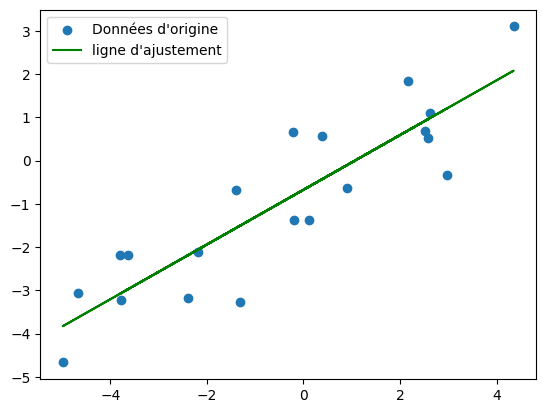

In [10]:
# --- Effectuer des prédictions

predicted = model(inputs).detach().numpy()

plt.scatter(X, y, label="Données d'origine")
plt.plot(X, predicted, label="ligne d'ajustement", color='green')
plt.legend()
plt.show()

In [11]:
# --- Comparer les vrais paramètres avec ceux trouvés par le modèle
# vraies valeurs : w = 0.5 | b = -1

w = model.weight.data.numpy()
b = model.bias.data.numpy()

print('Vraies valeurs: w = 0.5 | b = -1\n', f'Valeurs prédites: w = {w[0][0]} | b = {b[0]}')

Vraies valeurs: w = 0.5 | b = -1
 Valeurs prédites: w = 0.6327215433120728 | b = -0.6745030879974365


## <a id="requirements" style="color:black">REQUIREMENTS.txt</a>

<span style="color:orange">Ce notebook a été créé avec python 3.10</span>

Requirements.txt  

```
alembic==1.13.2
aniso8601==9.0.1
anyio==4.4.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.2.0
Babel==2.15.0
bcrypt==4.1.3
beautifulsoup4==4.12.3      
bleach==6.1.0
blinker==1.8.2
boto3==1.35.35
botocore==1.35.40
cachetools==5.4.0
certifi==2024.6.2
cffi==1.16.0
charset-normalizer==3.3.2   
click==8.1.7
cloudpickle==3.0.0
colorama==0.4.6
comm==0.2.2
contourpy==1.2.1
cryptography==42.0.8        
cycler==0.12.1
databricks-sdk==0.31.1      
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
Deprecated==1.2.14
docker==7.1.0
entrypoints==0.4
exceptiongroup==1.2.1
executing==2.0.1
fastjsonschema==2.19.1
filelock==3.13.1
Flask==3.0.3
fonttools==4.53.0
fqdn==1.5.1
fsspec==2024.2.0
gitdb==4.0.11
GitPython==3.1.43
google-auth==2.34.0
graphene==3.3
graphql-core==3.2.3
graphql-relay==3.2.0
greenlet==3.0.3
h11==0.14.0
httpcore==1.0.5
httpx==0.27.0
idna==3.7
imageio==2.35.1
importlib_metadata==7.1.0
intel-openmp==2021.4.0
ipykernel==6.29.4
ipython==8.25.0
ipywidgets==8.1.3
isoduration==20.11.0
itsdangerous==2.2.0
jedi==0.19.1
Jinja2==3.1.3
jmespath==1.0.1
joblib==1.4.2
json5==0.9.25
jsonpointer==3.0.0
jsonschema==4.22.0
jsonschema-specifications==2023.12.1
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter_client==8.6.2
jupyter_core==5.7.2
jupyter_server==2.14.1
jupyter_server_terminals==0.5.3
jupyterlab==4.2.2
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.2
jupyterlab_widgets==3.0.11
kiwisolver==1.4.5
lazy_loader==0.4
Mako==1.3.5
Markdown==3.6
MarkupSafe==2.1.5
matplotlib==3.9.0
matplotlib-inline==0.1.7
mistune==3.0.2
mkl==2021.4.0
mlflow==2.15.1
mlflow-skinny==2.15.1
mpmath==1.3.0
nbclient==0.10.0
nbconvert==7.16.4
nbformat==5.10.4
nest-asyncio==1.6.0
networkx==3.2.1
notebook==7.2.1
notebook_shim==0.2.4
numpy==1.26.3
opentelemetry-api==1.25.0
opentelemetry-sdk==1.25.0
opentelemetry-semantic-conventions==0.46b0
overrides==7.7.0
packaging==24.1
pandas==2.2.2
pandocfilters==1.5.1
paramiko==3.4.0
parso==0.8.4
pillow==10.2.0
platformdirs==4.2.2
prometheus_client==0.20.0
prompt_toolkit==3.0.47
protobuf==5.28.2
psutil==5.9.8
pure-eval==0.2.2
pyarrow==15.0.2
pyasn1==0.6.0
pyasn1_modules==0.4.0
pycparser==2.22
Pygments==2.18.0
PyNaCl==1.5.0
pyparsing==3.1.2
pysftp==0.2.8
python-dateutil==2.9.0.post0
python-json-logger==2.0.7
pytz==2024.1
pywin32==306
pywinpty==2.0.13
PyYAML==6.0.1
pyzmq==26.0.3
qtconsole==5.5.2
QtPy==2.4.1
querystring-parser==1.2.4
referencing==0.35.1
requests==2.32.3
rfc3339-validator==0.1.4
rfc3986-validator==0.1.1
rpds-py==0.18.1
rsa==4.9
s3transfer==0.10.3
scikit-image==0.24.0
scikit-learn==1.5.1
scipy==1.14.0
Send2Trash==1.8.3
six==1.16.0
smmap==5.0.1
sniffio==1.3.1
soupsieve==2.5
SQLAlchemy==2.0.31
sqlparse==0.5.1
stack-data==0.6.3
sympy==1.12
tbb==2021.11.0
terminado==0.18.1
threadpoolctl==3.5.0
tifffile==2024.9.20
tinycss2==1.3.0
tomli==2.0.1
torch==2.3.1+cu121
torchaudio==2.3.1+cu121
torchvision==0.18.1+cu121
tornado==6.4.1
traitlets==5.14.3
types-python-dateutil==2.9.0.20240316
typing_extensions==4.9.0
tzdata==2024.1
uri-template==1.3.0
urllib3==2.2.1
waitress==3.0.0
wcwidth==0.2.13
webcolors==24.6.0
webencodings==0.5.1
websocket-client==1.8.0
Werkzeug==3.0.3
widgetsnbextension==4.0.11
wrapt==1.16.0
zipp==3.19.2
```